# Observed Trends
    1) Maximum temperatures observed by city tend to max out around cities with latitude close to zero. Observed temperatures also appear more closely clustered around latitude = 0, and vary more as latitudes move further away from zero.
    
    2) There are clusters of observed city humidities at 100% and 0% within the latitude range 60-80. This sample also contains cities with humidity at 100% across nearly the entire latitude range.
    
    3) Observed wind speeds have the most data points with speed below 10 mph in cities with positive latitudes (>0), though wind speed ranges are similar across all latitudes.

In [1]:
from citipy import citipy
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = '../weather_apikey'

def get_file_contents(file):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(file, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % file)

In [3]:
api_key = get_file_contents(file)
api_key = api_key[-33:-1]
#print("Our API key is: %s" % (api_key))

In [4]:
lats = np.random.uniform(-90, 91, size=55)
lngs = np.random.uniform(-180, 181, size=55)
#lats = range(-90, 91)
#lngs = range(-180, 181)

city_list = []

for lat in lats:
    for lng in lngs:
        city = citipy.nearest_city(lat, lng)
        city_list.append(city)

city_pd = pd.DataFrame(city_list)
sampled_cities = city_pd.sample(3000)
sampled_cities.describe()

,0
count,3000
unique,700
top,<citipy.citipy.City object at 0x10e281cf8>
freq,124


In [5]:
sampled_cities = sampled_cities[0].unique()

In [6]:
target_urls = []
for city in sampled_cities:
    name = city.city_name
    country_code = city.country_code
    target_url = "http://api.openweathermap.org/data/2.5/weather" \
    +"?"+"units=IMPERIAL&mode=json&APPID="+api_key+"&q="+name+","+country_code
    target_urls.append(target_url)
    print(target_url)

http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&mode=json&APPID=6f3d7c33078d605163112a422c1bd6a0&q=kapaa,us
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&mode=json&APPID=6f3d7c33078d605163112a422c1bd6a0&q=hithadhoo,mv
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&mode=json&APPID=6f3d7c33078d605163112a422c1bd6a0&q=arraial do cabo,br
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&mode=json&APPID=6f3d7c33078d605163112a422c1bd6a0&q=makakilo city,us
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&mode=json&APPID=6f3d7c33078d605163112a422c1bd6a0&q=quang ngai,vn
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&mode=json&APPID=6f3d7c33078d605163112a422c1bd6a0&q=hualmay,pe
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&mode=json&APPID=6f3d7c33078d605163112a422c1bd6a0&q=tuktoyaktuk,ca
http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&mode=json&APPID=6f3d7c33078d605163112a422c1bd6a0&

In [7]:
name = []
temp = []
humidity = []
clouds = []
wind = []
lat = []

for url in target_urls:
    city_weather = requests.get(url).json()
    if city_weather != {'cod': '404', 'message': 'city not found'}:
        city_name = city_weather['name']
        name.append(city_name)
        city_temp = city_weather['main']['temp_max']
        temp.append(city_temp)
        city_humidity = city_weather['main']['humidity']
        humidity.append(city_humidity)
        city_clouds = city_weather['clouds']['all']
        clouds.append(city_clouds)
        city_wind = city_weather['wind']['speed']
        wind.append(city_wind)
        city_lat = city_weather['coord']['lat']
        lat.append(city_lat)
        #print(json.dumps(city_weather, indent=2, sort_keys=True))
        #print(city_name, city_temp, city_humidity, city_clouds, city_wind, city_lat)

In [8]:
city_data = {'City': name, 'Max Temperature (F)': temp, 'Humidity (%)': humidity,
        'Cloudiness (%)': clouds, 'Wind Speed (mph)': wind, 'Latitude': lat}
city_data = pd.DataFrame(city_data)
city_data.head()

,City,Cloudiness (%),Humidity (%),Latitude,Max Temperature (F),Wind Speed (mph)
0,Kapaa,20,54,22.08,78.80,19.46
1,Hithadhoo,24,100,-0.60,80.76,2.59
2,Arraial do Cabo,64,94,-22.97,75.67,10.09
3,Makakilo City,40,69,21.35,78.80,9.17
4,Quang Ngai,8,60,15.12,79.27,3.15


In [9]:
len(city_data)

611

In [10]:
city_data.to_csv("WeatherData.csv", index = False, header = True)

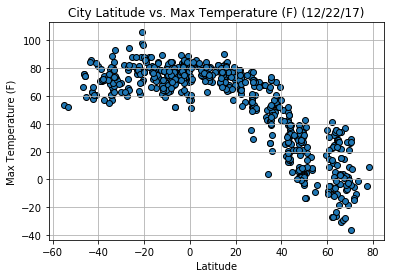

In [11]:
plt.scatter(lat, temp, marker="o", linewidth = 1, edgecolor='black')
plt.title("City Latitude vs. Max Temperature (F) (12/22/17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("LatitudeVsTemperature.png")
plt.show()

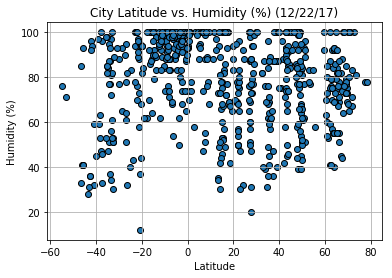

In [12]:
plt.scatter(lat, humidity, marker="o", linewidth = 1, edgecolor='black')
plt.title("City Latitude vs. Humidity (%) (12/22/17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("LatitudeVsHumidity.png")
plt.show()

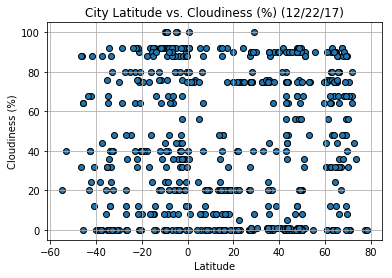

In [13]:
plt.scatter(lat, clouds, marker="o", linewidth = 1, edgecolor='black')
plt.title("City Latitude vs. Cloudiness (%) (12/22/17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("LatitudeVsCloudiness.png")
plt.show()

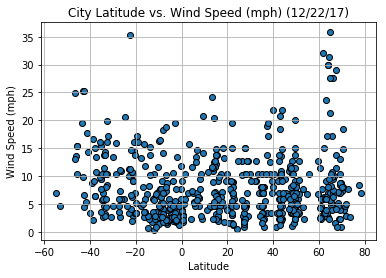

In [14]:
plt.scatter(lat, wind, marker="o", linewidth = 1, edgecolor='black')
plt.title("City Latitude vs. Wind Speed (mph) (12/22/17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("LatitudeVsWindSpeed.png")
plt.show()